# Warpy: open-source Farcaster datasets

Welcome to Warpy! Download Farcaster datasets by running `python main.py download`. This notebook will walk you through the things you can do with it.

In [8]:
import sqlite3
import polars as pl
import pandas as pd


def query_db(query: str, to_pandas: bool = False) -> pl.DataFrame:
    with sqlite3.connect('datasets/datasets.db') as con:
        cur = con.cursor()
        cur.execute(query)
        column_names = [description[0] for description in cur.description]
        if to_pandas:
            return pd.DataFrame(cur, columns=column_names)
        return pl.DataFrame(cur, schema=column_names)


In [9]:
# normal sql query, nothin' fancy
query = "select * from users order by random() limit 3"

print(query_db(query))

shape: (3, 12)
┌──────┬──────────┬────────────┬────────────┬───┬────────────┬────────────┬────────────┬───────────┐
│ fid  ┆ username ┆ display_na ┆ pfp_url    ┆ … ┆ farcaster_ ┆ external_a ┆ registered ┆ location_ │
│ ---  ┆ ---      ┆ me         ┆ ---        ┆   ┆ address    ┆ ddress     ┆ _at        ┆ id        │
│ i64  ┆ str      ┆ ---        ┆ str        ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---       │
│      ┆          ┆ str        ┆            ┆   ┆ str        ┆ str        ┆ i64        ┆ str       │
╞══════╪══════════╪════════════╪════════════╪═══╪════════════╪════════════╪════════════╪═══════════╡
│ 4261 ┆ 0xmh     ┆ Matthias   ┆ https://i. ┆ … ┆ 0x56Fea848 ┆ 0xf59d09fd ┆ 1666731987 ┆           │
│      ┆          ┆ Hauser     ┆ postimg.cc ┆   ┆ 07A0a47dF7 ┆ 2c2f19237a ┆ 023        ┆           │
│      ┆          ┆            ┆ /T3vmdcpP/ ┆   ┆ a771269A88 ┆ 69e6b232c1 ┆            ┆           │
│      ┆          ┆            ┆ Sc…        ┆   ┆ e2…        ┆ 6f…        ┆ 

In [10]:
# You can also use ChatGPT to write SQL queries for you
# ex: `python main.py query "get three random users"`
!python main.py query "get three random users"

Sending query to ChatGPT...

SQL from ChatGPT: 

SELECT * FROM users ORDER BY RANDOM() LIMIT 3;

shape: (3, 12)
┌──────┬────────┬────────────┬───────┬───┬────────────┬────────────┬────────────┬───────────┐
│ fid  ┆ userna ┆ display_na ┆ pfp_u ┆ … ┆ farcaster_ ┆ external_a ┆ registered ┆ location_ │
│ ---  ┆ me     ┆ me         ┆ rl    ┆   ┆ address    ┆ ddress     ┆ _at        ┆ id        │
│ i64  ┆ ---    ┆ ---        ┆ ---   ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---       │
│      ┆ str    ┆ str        ┆ str   ┆   ┆ str        ┆ str        ┆ i64        ┆ str       │
╞══════╪════════╪════════════╪═══════╪═══╪════════════╪════════════╪════════════╪═══════════╡
│ 6632 ┆ hao    ┆ Hao        ┆ https ┆ … ┆ 0x2c2c1179 ┆ 0x03894d4a ┆ 1670315823 ┆           │
│      ┆        ┆            ┆ ://i. ┆   ┆ 5e14dC1402 ┆ c41dd6c4c2 ┆ 229        ┆           │
│      ┆        ┆            ┆ seadn ┆   ┆ 4CF36ee3fD ┆ f524ed4417 ┆            ┆           │
│      ┆        ┆            ┆ .io/g ┆   ┆

In [11]:
# here's a fancier query: get all farcasters in japan
query = "SELECT * FROM users WHERE location_id IN (SELECT id FROM locations WHERE description LIKE '%Japan%') LIMIT 3;"

print(query_db(query))

shape: (3, 12)
┌───────┬───────────┬────────────┬──────────┬───┬────────────┬────────────┬────────────┬───────────┐
│ fid   ┆ username  ┆ display_na ┆ pfp_url  ┆ … ┆ farcaster_ ┆ external_a ┆ registered ┆ location_ │
│ ---   ┆ ---       ┆ me         ┆ ---      ┆   ┆ address    ┆ ddress     ┆ _at        ┆ id        │
│ i64   ┆ str       ┆ ---        ┆ str      ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---       │
│       ┆           ┆ str        ┆          ┆   ┆ str        ┆ str        ┆ i64        ┆ str       │
╞═══════╪═══════════╪════════════╪══════════╪═══╪════════════╪════════════╪════════════╪═══════════╡
│ 7484  ┆ pierceswo ┆ PiercedCAT ┆ https:// ┆ … ┆ 0x0738C27A ┆ 0xdafa9e3d ┆ 1671567770 ┆ ChIJr-eHX │
│       ┆ rd        ┆            ┆ i.imgur. ┆   ┆ D059298552 ┆ ae493f0b9d ┆ 334        ┆ CDBGGARXv │
│       ┆           ┆            ┆ com/QpOb ┆   ┆ 63724c8a33 ┆ 6872eff4fd ┆            ┆ aiv8DydIw │
│       ┆           ┆            ┆ dH6.jpg  ┆   ┆ b6…        ┆ a0…        ┆ 

In [12]:
# you can also use pandas or polars to process things
# ex: get all users where they have at least 5 casts that contain "gjelina" or "erewhon"
query = "SELECT * FROM casts WHERE text LIKE '%gjelina%' OR text LIKE '%erewhon%'"
cast_df = query_db(query, to_pandas=True)

# get all users where they have at least 5 casts that contain "gjelina" or "erewhon"
cast_df = cast_df.groupby('author_fid').filter(lambda x: len(x) >= 5)
print(pl.DataFrame._from_pandas(cast_df))

# get user info 
fids = cast_df['author_fid'].unique()
query = f"SELECT * FROM users WHERE fid IN {tuple(fids)}"
users_df = query_db(query, to_pandas=True)
print(pl.DataFrame._from_pandas(users_df))


shape: (61, 6)
┌─────────────────┬─────────────────┬────────────────┬───────────────┬────────────┬────────────────┐
│ hash            ┆ thread_hash     ┆ text           ┆ timestamp     ┆ author_fid ┆ parent_hash    │
│ ---             ┆ ---             ┆ ---            ┆ ---           ┆ ---        ┆ ---            │
│ str             ┆ str             ┆ str            ┆ i64           ┆ i64        ┆ str            │
╞═════════════════╪═════════════════╪════════════════╪═══════════════╪════════════╪════════════════╡
│ 0xd913c709681ed ┆ 0xa75522564a761 ┆ @v you should  ┆ 1642197646067 ┆ 3          ┆ 0x82939b1b7c8e │
│ 094c979ee2c09ec ┆ 3a5b89e82c7f2fb ┆ get a coffee   ┆               ┆            ┆ eea68cd1a984a3 │
│ 47…             ┆ 3a…             ┆ mug o…         ┆               ┆            ┆ 351f…          │
│ 0xf75a80ff9b881 ┆ 0xceae07d6f3908 ┆ Erewhon!       ┆ 1647543862106 ┆ 3          ┆ 0xceae07d6f390 │
│ e43cee1aac105dd ┆ 2505038b1463b93 ┆                ┆               ┆      

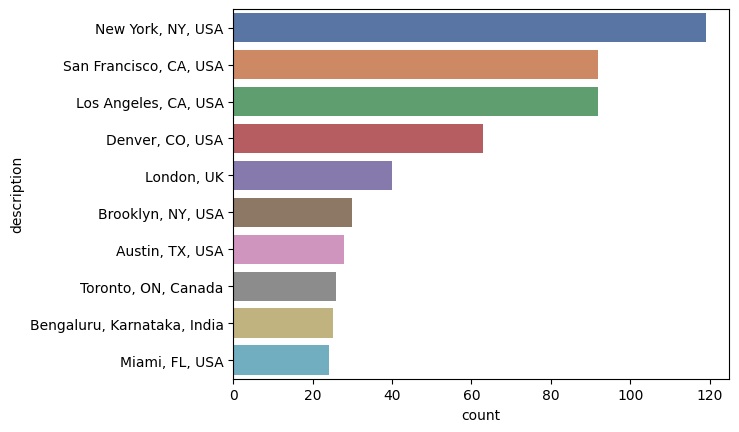

In [14]:
# you can also use seaborn/matplotlib to visualize things
# ex: plot top 10 farcasters' most frequent locations

# Note: you have to run `pip install seaborn` to use seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# get top 10 farcasters' most frequent locations
query = """
SELECT l.description, COUNT(*) AS count
FROM users u
JOIN locations l ON u.location_id = l.id
WHERE u.farcaster_address IS NOT NULL
GROUP BY l.description
ORDER BY count DESC
LIMIT 10;
"""

df = query_db(query, to_pandas=True)

sns.barplot(x='count', y='description', data=df, palette="deep")
plt.show()



I hope you enjoy using Warpy!

Complaints, comments, feedback to go @pixel on Farcaster :)
